In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. train_data

In [2]:
train_data = pd.read_csv(r'C:/Users/Hp/Desktop/Data_Science_Jupyter/Project_6/data/train.csv')

In [3]:
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
train_data.shape

(1017209, 9)

In [6]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

# 2. Test_data

In [7]:
test_data = pd.read_csv(r'C:/Users/Hp/Desktop/Data_Science_Jupyter/Project_6/data/test.csv')

In [8]:
test_data.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [10]:
test_data.shape

(41088, 8)

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [12]:
test_data = test_data.fillna({'Open': 0})

In [13]:
test_data.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

# 3. Store_data

In [15]:
store_data = pd.read_csv(r'C:/Users/Hp/Desktop/Data_Science_Jupyter/Project_6/data/store.csv')

In [16]:
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [18]:
store_data.shape

(1115, 10)

In [19]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:
#  Filling numerical missing values with median
numerical_cols = store_data.select_dtypes(include=['float64', 'int64']).columns
store_data[numerical_cols] = store_data[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)

In [21]:
# Filling categorical missing values with 'Unknown'
categorical_cols = store_data.select_dtypes(include=['object']).columns
store_data[categorical_cols] = store_data[categorical_cols].apply(lambda x: x.fillna('Unknown'))

In [22]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# 4. Sample_Submission_data

In [23]:
sample_data = pd.read_csv(r'C:/Users/Hp/Desktop/Data_Science_Jupyter/Project_6/data/sample_submission.csv')

In [24]:
sample_data.head(5)

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [25]:
sample_data.isnull().sum()

Id       0
Sales    0
dtype: int64

In [26]:
sample_data.shape

(41088, 2)

# Merging 'train.csv' and 'store.csv'

# Both dataset have common column 'store'
We use that column to merge store into train dataset

In [27]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Day'] = train_data.index.day
train_data['WeekOfYear'] = train_data.index.isocalendar().week
train_data['Dates']=train_data.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train_data['Dates']=pd.to_datetime(train_data['Dates'])

In [28]:
train_data.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Dates
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,2015-07-31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,2015-07-31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,2015-07-31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,2015-07-31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,2015-07-31


In [29]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'Dates'],
      dtype='object')

In [30]:
train_data.shape

(1017209, 13)

In [31]:
train_store_data = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

In [32]:
train_store_data.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
1,2,5,6064,625,1,1,0,1,2015,7,...,2015-07-31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,2015-07-31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,2015-07-31,c,c,620.0,9.0,2009.0,0,22.0,2012.0,Unknown
4,5,5,4822,559,1,1,0,1,2015,7,...,2015-07-31,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,Unknown


In [33]:
train_store_data.shape

(1017209, 22)

In [34]:
train_store_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,Dates,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,23.615515,2014-04-11 01:30:42.846061824,5.422021e+03,7.469899e+00,2.009107e+03,5.005638e-01,2.263526e+01,2.011876e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.0,2013-01-01 00:00:00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,11.0,2013-08-17 00:00:00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,2.200000e+01,2.012000e+03
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,22.0,2014-04-02 00:00:00,2.325000e+03,8.000000e+00,2.010000e+03,1.000000e+00,2.200000e+01,2.012000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,35.0,2014-12-12 00:00:00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,52.0,2015-07-31 00:00:00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,14.433381,NaN,7.706918e+03,2.677243e+00,4.986802e+00,4.999999e-01,9.993137e+00,1.182965e+00


# Reading the description report

# Sales
The minimum sale is 0

The maximum sale is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

# Customers
The minimum customer is 0

The maximum customer is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [35]:
train_store_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'Dates', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [37]:
train_store_data.to_csv(r'C:/Users/Hp/Desktop/Data_Science_Jupyter/Project_6/data/train_store_data.csv',index=False)

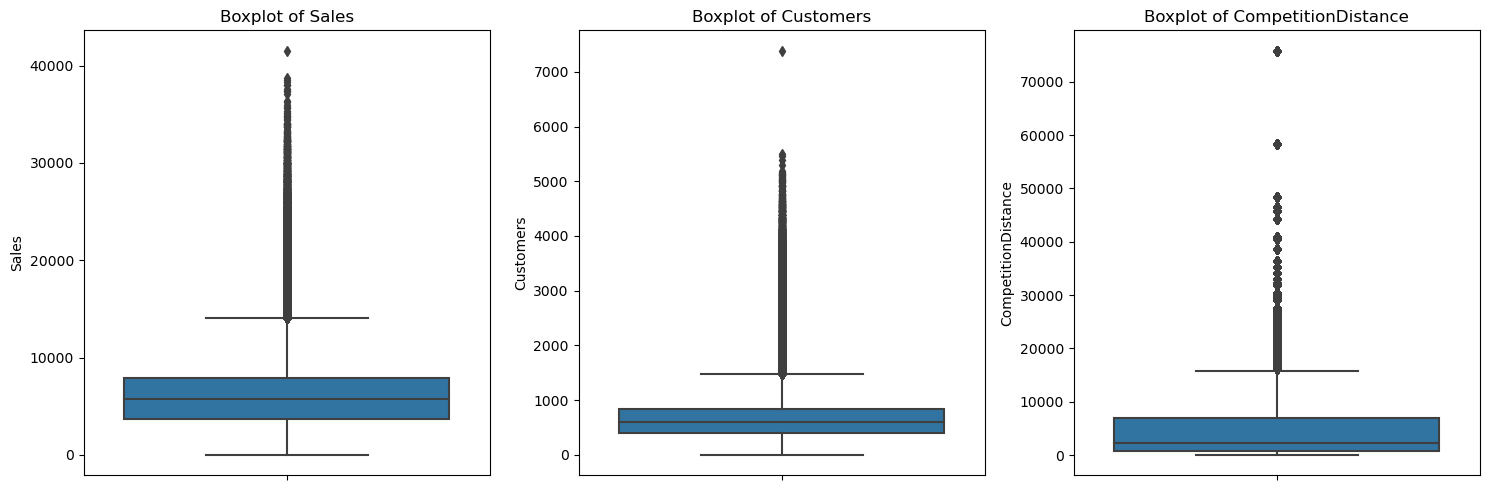

In [39]:
numerical_features = ['Sales', 'Customers', 'CompetitionDistance']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=train_store_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()